In [2]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from datetime import datetime
#sns.set_style('darkgrid', {'axes.facecolor': '.9'})
#sns.set_palette(palette='deep')
#sns_c = sns.color_palette(palette='deep')
%matplotlib inline

In [3]:
df=pd.read_csv('D:/Second_paper_data/COVID-EMDA-master/data_release/spp/kck_train_data_covid_42days_component.csv', parse_dates=['date'])

In [6]:
df.tail()

,Unnamed: 0,date,total_load,daily_mean_temp,full_time_work_behavior_devices,completely_home_device_count,Restaurant_Recreaction,Retail,trans,LocalLinearTrend,Dynamic,completely_coefficients,Restaurant_coefficients,Retail_coefficients
695,696,2020-11-26,37754.0,4.858333,329,3624,4434,10625,15059,59871.518794,-22122.216768,-4.061030,-0.939174,-0.305012
696,697,2020-11-27,37216.0,5.335833,320,3044,5453,12594,18047,59907.246157,-22465.573566,-4.321671,-0.977921,-0.315849
697,698,2020-11-28,37665.1,5.467083,359,3151,5720,14357,20077,60216.719459,-22529.029627,-4.035851,-0.955631,-0.302699
698,699,2020-11-29,39442.5,4.117917,285,3733,4227,10805,15032,60579.346684,-20904.519048,-3.727611,-0.905007,-0.292816
699,700,2020-11-30,46434.5,-1.201667,661,3202,3782,9996,13778,61138.240456,-15190.743876,-2.922577,-0.843591,-0.264325


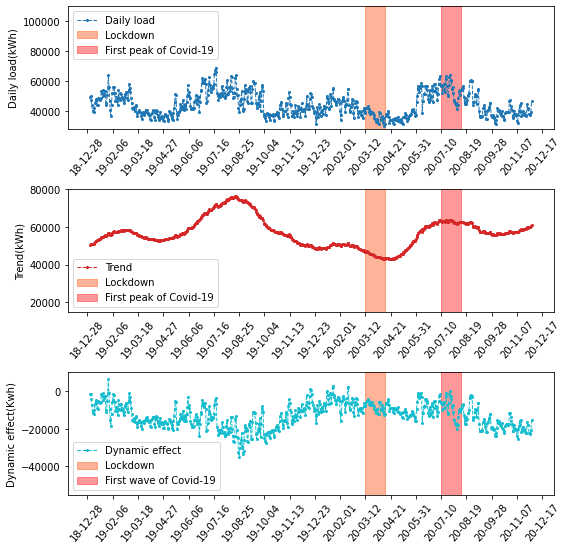

In [64]:
colors = sns.color_palette()
c1, c2, c3, c4, c5, c6,c7,c8,c9,c10 = colors[0], colors[1], colors[2], colors[3], colors[4], colors[5],colors[6],colors[7],colors[8],colors[9]

fig = plt.figure()
fig.set_size_inches(8,8)
ax = fig.add_subplot(3, 1, 1)
ax.plot(df['date'], df['total_load'], lw=1, label="Daily load", c=c1,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-12', '2020-04-12', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-07-10', '2020-08-10', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Daily load(kWh)")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper left')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=40))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=50)
ax.set_ylim([28000, 110000])

ax = fig.add_subplot(3, 1, 2)
ax.plot(df['date'], df['LocalLinearTrend'], lw=1, label="Trend", c=c4,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-12', '2020-04-12', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-07-10', '2020-08-10', label='First peak of Covid-19',alpha=0.4, color='red')
#ax.axvspan('2020-12-01', '2020-12-31', alpha=0.5, color=c9)
ax.set_ylabel("Trend(kWh)")
#ax.set_title("Los Angeles")
ax.legend(loc = 'best')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=40))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=50)
ax.set_ylim([15000, 80000])

ax = fig.add_subplot(3, 1, 3)
ax.plot(df['date'], df['Dynamic'], lw=1, label="Dynamic effect", c=c10,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-12', '2020-04-12', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-07-10', '2020-08-10', label='First wave of Covid-19',alpha=0.4, color='red')
#ax.axvspan('2020-12-01', '2020-12-31', alpha=0.5, color=c9)
ax.set_ylabel("Dynamic effect(Kwh)")
#ax.set_title("Los Angeles")
ax.legend( loc = 'best')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=40))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=50)
ax.set_ylim([-55000, 10000])

plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

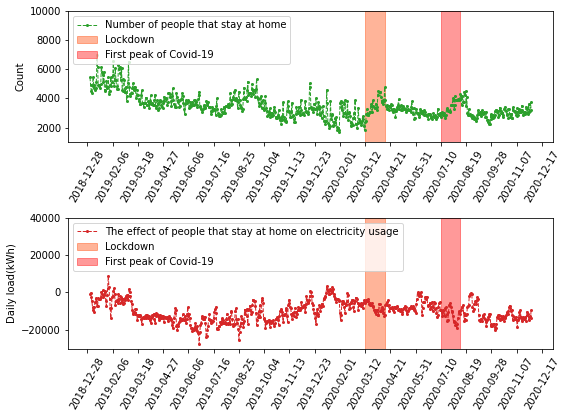

In [70]:
#colors = sns.color_palette()
#c1, c2, c3, c4, c5, c6 = colors[0], colors[1], colors[2], colors[3], colors[4], colors[5]

fig = plt.figure()
fig.set_size_inches(8,6)
ax = fig.add_subplot(2, 1, 1)
ax.plot(df['date'], df['completely_home_device_count'], lw=1, label="Number of people that stay at home", c=c3,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-12', '2020-04-12', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-07-10', '2020-08-10', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Count")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper left')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=40))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)
ax.set_ylim([1000, 10000])

ax = fig.add_subplot(2, 1, 2)
ax.plot(df['date'], df['completely_home_device_count']*df['completely_coefficients'], lw=1, label="The effect of people that stay at home on electricity usage", c=c4,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-12', '2020-04-12', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-07-10', '2020-08-10', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Daily load(kWh)")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper left')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=40))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)
ax.set_ylim([-30000, 40000])

plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

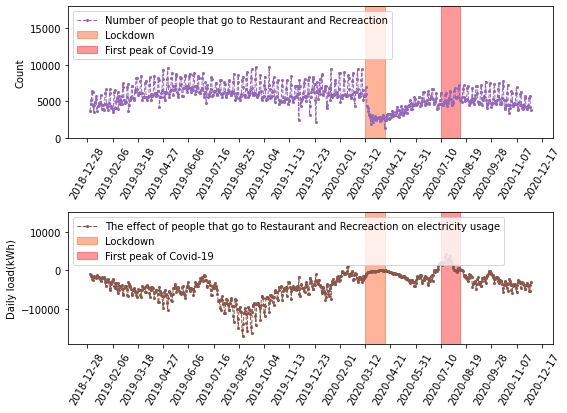

In [78]:
fig = plt.figure()
fig.set_size_inches(8,6)
ax = fig.add_subplot(2, 1, 1)
ax.plot(df['date'], df['Restaurant_Recreaction'], lw=1, label="Number of people that go to Restaurant and Recreaction", c=c5,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-12', '2020-04-12', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-07-10', '2020-08-10', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Count")
#ax.set_title("Los Angeles")
ax.legend( loc = 'best')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=40))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)
ax.set_ylim([0, 18000])

ax = fig.add_subplot(2, 1, 2)
ax.plot(df['date'], df['Restaurant_Recreaction']*df['Restaurant_coefficients'], lw=1, label="The effect of people that go to Restaurant and Recreaction on electricity usage", c=c6,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-12', '2020-04-12', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-07-10', '2020-08-10', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Daily load(kWh)")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper left')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=40))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)
ax.set_ylim([-19000, 15000])

plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

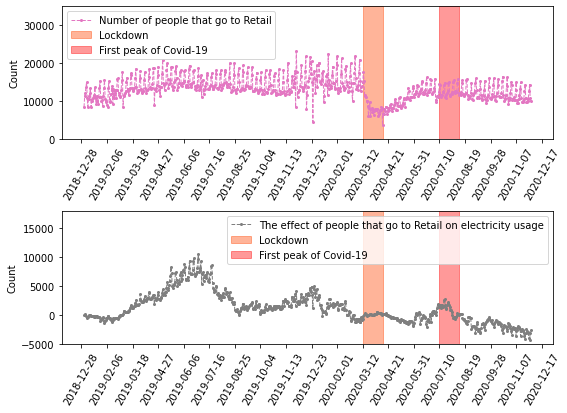

In [79]:
fig = plt.figure()
fig.set_size_inches(8,6)
ax = fig.add_subplot(2, 1, 1)
ax.plot(df['date'], df['Retail'], lw=1, label="Number of people that go to Retail", c=c7,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-12', '2020-04-12', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-07-10', '2020-08-10', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Count")
#ax.set_title("Los Angeles")
ax.legend( loc = 'best')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=40))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)
ax.set_ylim([0, 35000])

ax = fig.add_subplot(2, 1, 2)
ax.plot(df['date'], df['Retail']*df['Retail_coefficients'], lw=1, label="The effect of people that go to Retail on electricity usage", c=c8,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-12', '2020-04-12', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-07-10', '2020-08-10', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Count")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper right')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=40))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)
ax.set_ylim([-5000, 18000])

plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()